11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
375/375 [==============================] - 53s 135ms/step - loss: 0.2668 - accuracy: 0.9242 - val_loss: 0.0943 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 2/20
375/375 [==============================] - 37s 98ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0690 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 3/20
375/375 [==============================] - 40s 106ms/step - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0512 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 4/20
375/375 [==============================] - 47s 125ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0550 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 5/20
375/375 [==============================] - 37s 98ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0472 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 6/20
375/375 [==============================] - 37s 99ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0462 - val_accuracy: 0.9859 - l

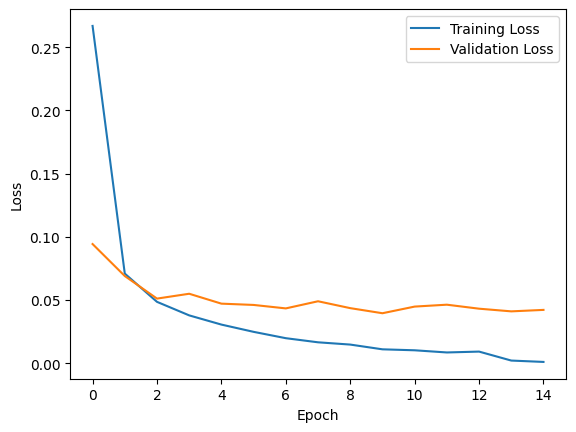

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the input data to fit the CNN input shape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callback functions
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[reduce_lr, early_stop])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
157/157 [==============================] - 16s 92ms/step - loss: 0.5851 - accuracy: 0.6790 - val_loss: 0.4375 - val_accuracy: 0.8152 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - 14s 87ms/step - loss: 0.3514 - accuracy: 0.8565 - val_loss: 0.3968 - val_accuracy: 0.8426 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - 14s 90ms/step - loss: 0.2229 - accuracy: 0.9149 - val_loss: 0.3922 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - 14s 91ms/step - loss: 0.1157 - accuracy: 0.9621 - val_loss: 0.4714 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - 14s 90ms/step - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.5057 - val_accuracy: 0.8510 - lr: 0.0010
Epoch 6/10
157/157 [==============================] - 14s 87ms/step - loss: 0.0315 - accuracy: 0.9918 - val_loss: 0.5785 - val_accuracy: 0.8160 - lr: 

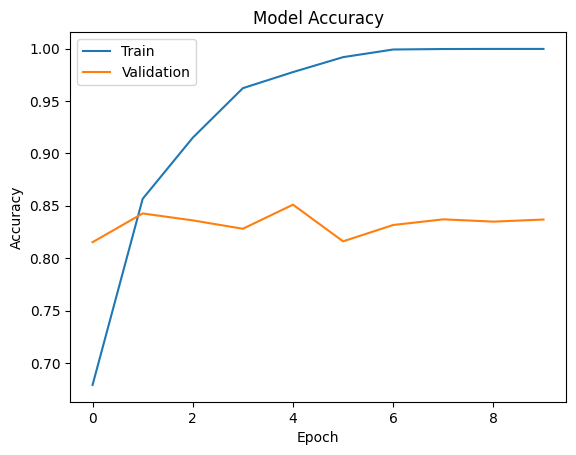

In [2]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the IMDb dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the text data
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the RNN model
embedding_dim = 50
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(SimpleRNN(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Hyperparameter optimization using Grid Search (Example)
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'learning_rate': [0.001, 0.01, 0.1],
#     'batch_size': [64, 128, 256],
#     'optimizer': ['adam', 'rmsprop', 'sgd']
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_search.fit(x_train, y_train)

# Train the RNN model with callback function for reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()